# Explorative Data Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import plotly.graph_objects as go
import plotly

import webbrowser
urL='https://www.google.com'
chrome_path="C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe"
webbrowser.register('chrome', None, webbrowser.BackgroundBrowser(chrome_path))
webbrowser.get('chrome').open_new_tab(urL)

True

In [2]:
mpl.rcParams['figure.figsize']= (16,9)
pd.set_option('display.max_rows',500)

sns.set(style="darkgrid")

In [3]:
df_plot=pd.read_csv('../data/processed/COVID_small.csv', sep=';')
df_plot.head()

,date,Italy,US,Spain,Germany,Korea/South
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


<Figure size 1152x648 with 0 Axes>

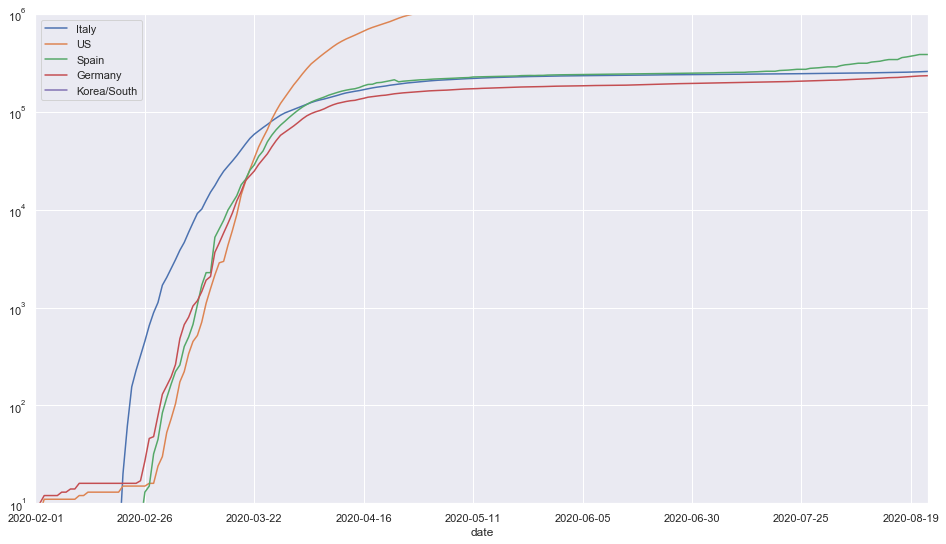

In [4]:
plt.figure();
ax=df_plot.iloc[10:,:].set_index('date').plot()
plt.ylim(10, 1000000)
ax.set_yscale('log')

# Dynamic Plots using Plot.ly

In [5]:
plotly.__version__

'4.9.0'

In [6]:
fig= go.Figure()

In [7]:
country_list=['Italy', 'US', 'Spain', 'Germany', 'Korea/South']

## defines how to plot individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date, 
                             y=df_plot[each], 
                             mode='markers+lines' ,
                             name=each))
## defines the overall layout properties
fig.update_layout(width=1600,
                  height=1200,
                  xaxis_title="Time", 
                  yaxis_title="confirmed infected people (src john hopkins csse)")

fig.update_yaxes(type="log", range=[1.1,5.5])

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show(renderer='chrome')

In [8]:
app = dash.Dash()
app.layout=html.Div([
    
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
    id='country_drop_down',
    options=[
        {'label': 'Italy', 'value': 'Italy'},
        {'label': 'US', 'value': 'US'},
        {'label': 'Spain', 'value': 'Spain'},
        {'label': 'Germany', 'value': 'Germany'},
        {'label': 'Korea/South', 'value': 'Korea/South'}
    ],
    value=['US','Germany'],
    multi=True
    ),
    
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [9]:
@app.callback( 
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x=df_plot.date, 
                             y=df_plot[each], 
                             mode='markers+lines' ,
                             name=each))
        
    return  {
        'data':traces,
        'layout': dict (width=1600,
                  height=1200,
                  xaxis_title="Time", 
                  yaxis_title="confirmed infected people (src john hopkins csse)")
    }

In [10]:
app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Debugger PIN: 260-960-936
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
